In [1]:
import requests
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%inline matplotlib

/Users/edwardamoah/Documents/GitHub/FloralArea/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
UsageError: Line magic function `%inline` not found.


In [10]:
files = os.listdir('/Users/edwardamoah/Downloads/experiment_3_images')

In [11]:
files = ['/Users/edwardamoah/Downloads/Experiment_3_images/' + file for file in files]

In [12]:
files

['/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171637048_100cm_F1_.jpg',
 '/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_172005738_100cm_F3_.jpg',
 '/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171819047_100cm_F2_.jpg',
 '/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171937537_100cm_F3_.jpg',
 '/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171827242_100cm_F2_.jpg',
 '/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171837365_60cm_F2_.jpg',
 '/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171953310_80cm_F3_.jpg',
 '/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_172351335_100cm_F5_.jpg',
 '/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171724834_60cm_F1_.jpg',
 '/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171717068_80cm_F1_.jpg']

In [13]:
import time 
area = []
mask = []
times = []

for file in files:
    start_time = time.time()
    print(file)
    url = 'http://localhost:8000/estimate_area/flower/0.5'
    file = {'uploaded_file': open(file, 'rb')}
    response = requests.post(url, files=file)
    response = response.json()
    area.append(response['area'])
    mask.append(response['mask'])
    times.append(time.time() - start_time)
    
    #print(response.json())

/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171637048_100cm_F1_.jpg
/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_172005738_100cm_F3_.jpg
/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171819047_100cm_F2_.jpg
/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171937537_100cm_F3_.jpg
/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171827242_100cm_F2_.jpg
/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171837365_60cm_F2_.jpg
/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171953310_80cm_F3_.jpg
/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_172351335_100cm_F5_.jpg
/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171724834_60cm_F1_.jpg
/Users/edwardamoah/Downloads/Experiment_3_images/PXL_20240214_171717068_80cm_F1_.jpg


In [16]:
filename= [file.split('/')[-1] for file in files]
df = pd.DataFrame({'area': area, 'mask': mask, 'images': filename, 'time': times})

In [17]:
df

,area,mask,images,time
0,5.291555,api/data/output/flower_0.5_d1711aae-2084-4309-...,PXL_20240214_171637048_100cm_F1_.jpg,2.054909
1,1.595462,api/data/output/flower_0.5_54107666-c1e4-460d-...,PXL_20240214_172005738_100cm_F3_.jpg,1.560904
2,5.673267,api/data/output/flower_0.5_f528806a-89f4-41ca-...,PXL_20240214_171819047_100cm_F2_.jpg,1.669320
3,1.190337,api/data/output/flower_0.5_37f923be-e87f-4774-...,PXL_20240214_171937537_100cm_F3_.jpg,1.611398
4,6.986128,api/data/output/flower_0.5_66f5b524-e08e-4450-...,PXL_20240214_171827242_100cm_F2_.jpg,1.578122
5,6.721779,api/data/output/flower_0.5_d7dda357-e47f-4893-...,PXL_20240214_171837365_60cm_F2_.jpg,1.669129
6,1.268530,api/data/output/flower_0.5_9af33ebd-af83-4604-...,PXL_20240214_171953310_80cm_F3_.jpg,1.576636
7,2.674180,api/data/output/flower_0.5_ed5baad9-fe05-4d33-...,PXL_20240214_172351335_100cm_F5_.jpg,1.601048
8,7.493321,api/data/output/flower_0.5_55656861-5625-46a7-...,PXL_20240214_171724834_60cm_F1_.jpg,1.609255
9,5.877161,api/data/output/flower_0.5_4aab64e7-0480-4cb0-...,PXL_20240214_171717068_80cm_F1_.jpg,1.574413


In [18]:
#df.to_csv('/Users/edwardamoah/Documents/GitHub/FloralArea/research/floralarea_experiment_2.csv', index=False)

In [19]:
# load other data
df1 = pd.read_csv("/Users/edwardamoah/Downloads/measuring_time_experiment3 - Sheet1.csv")

In [29]:
#df1["name"] = 

df1["name"] = df1["images"].str.split("_.tif").str[0]

In [30]:
df1

,images,flower_number,imagej_area,measuring_time,algorithm_time,name
0,PXL_20240214_171637048_100cm_F1_.tif,F1,5.383,297.12,NaN,PXL_20240214_171637048_100cm_F1
1,PXL_20240214_171717068_80cm_F1_.tif,F2,5.959,351.00,NaN,PXL_20240214_171717068_80cm_F1
2,PXL_20240214_171724834_60cm_F1_.tif,F3,7.706,379.54,NaN,PXL_20240214_171724834_60cm_F1
3,PXL_20240214_171819047_100cm_F2_.tif,F4,6.111,271.53,NaN,PXL_20240214_171819047_100cm_F2
4,PXL_20240214_171827242_100cm_F2_.tif,F5,7.060,292.51,NaN,PXL_20240214_171827242_100cm_F2
5,PXL_20240214_171837365_60cm_F2_.tif,F6,8.899,303.37,NaN,PXL_20240214_171837365_60cm_F2
6,PXL_20240214_171937537_100cm_F3_.tif,F7,1.084,80.53,NaN,PXL_20240214_171937537_100cm_F3
7,PXL_20240214_171953310_80cm_F3_.tif,F8,1.214,90.72,NaN,PXL_20240214_171953310_80cm_F3
8,PXL_20240214_172005738_100cm_F3_.tif,F9,1.515,114.42,NaN,PXL_20240214_172005738_100cm_F3
9,PXL_20240214_172351335_100cm_F5_.tif,F13,2.527,142.97,NaN,PXL_20240214_172351335_100cm_F5


In [32]:
df["name"] = df["images"].str.split("_.jpg").str[0]

In [34]:
df2 = df.merge(df1, on="name")

([<matplotlib.axis.XTick at 0x175090df0>,
 [Text(1, 0, 'FloralArea Algorithm'), Text(2, 0, 'ImageJ')])

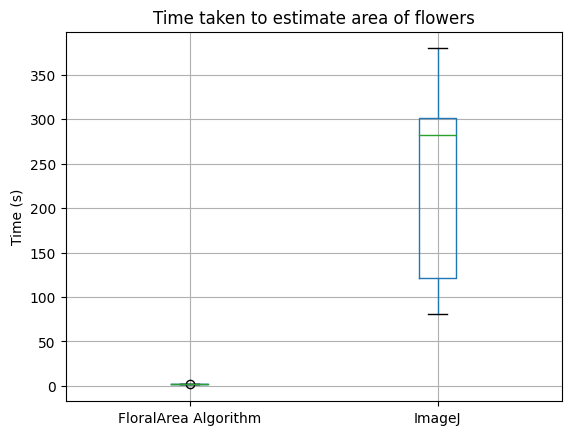

In [40]:
df2[["time", "measuring_time"]].boxplot()
plt.title("Time taken to estimate area of flowers")
plt.ylabel("Time (s)")
plt.xticks([1, 2], ["FloralArea Algorithm", "ImageJ"])
#df2[["time", "measuring_time"]].plot(kind="bar")

In [41]:
df2[["time", "measuring_time"]].describe()

,time,measuring_time
count,10.000000,10.000000
mean,1.650513,232.371000
std,0.146982,113.107935
min,1.560904,80.530000
25%,1.577008,121.557500
50%,1.605152,282.020000
75%,1.654696,301.807500
max,2.054909,379.540000


In [44]:
df2["time"].mean()

1.6505133628845214

In [45]:
df2["measuring_time"].mean()

232.371

In [46]:
df2["time"].sum()

16.505133628845215

In [50]:
df2["measuring_time"].sum()/60

38.728500000000004